<center>
<b style="font-size: 30px">Введение в PyTorch</b>
    <br>
<b style="font-size: 15">Виктор Антипов, Виктор Китов</b>
</center>

# О pytorch


PyTorch - open source библиотека для автоматического дифференцирования с реализацией основных нейросетевых моделей, для обработки векторных данных, изображений, текстов и т.д. Разработана Facebook's AI Research lab (FAIR).

In [31]:
# установка через командную строку (см. https://pytorch.org/get-started/locally/ для более кастомизируемой настройки [с видеокартой])
# !pip3 install torch==1.9.0 torchvision

In [2]:
import numpy as np
import torch
print(torch.__version__)

1.9.0.post2


### Pytorch и Numpy

#### Код Numpy

In [33]:
x = np.arange(9).reshape(3, 3)

print("X :\n%s\n" % x)
print("X.shape : %s\n" % (x.shape,))
print("X*X^T  :\n%s\n" % np.dot(x, x.T))
print("Mean over cols :\n%s\n" % (x.mean(axis=-1)))
print("Cumsum of cols :\n%s\n" % (np.cumsum(x, axis=0)))

X :
[[0 1 2]
 [3 4 5]
 [6 7 8]]

X.shape : (3, 3)

X*X^T  :
[[  5  14  23]
 [ 14  50  86]
 [ 23  86 149]]

Mean over cols :
[1. 4. 7.]

Cumsum of cols :
[[ 0  1  2]
 [ 3  5  7]
 [ 9 12 15]]



#### Код PyTorch

In [34]:
x = np.arange(9).reshape(3, 3)

x = torch.tensor(x, dtype=torch.float32)


print("X :\n%s" % x)
print("X.shape : %s\n" % (x.shape,))
print("X*X^T  :\n%s" % torch.matmul(x, x.transpose(1, 0)))
print("Mean over cols :\n%s" % torch.mean(x, dim=-1))
print("Cumsum of cols :\n%s" % torch.cumsum(x, dim=0))

X :
tensor([[0., 1., 2.],
        [3., 4., 5.],
        [6., 7., 8.]])
X.shape : torch.Size([3, 3])

X*X^T  :
tensor([[  5.,  14.,  23.],
        [ 14.,  50.,  86.],
        [ 23.,  86., 149.]])
Mean over cols :
tensor([1., 4., 7.])
Cumsum of cols :
tensor([[ 0.,  1.,  2.],
        [ 3.,  5.,  7.],
        [ 9., 12., 15.]])


### Разминка

Построим зависимость следующего вида:

$$ x(t) = cos( 13 t) + sin(12 t) $$
$$ y(t) = cos( 12 t) + sin(13 t) $$


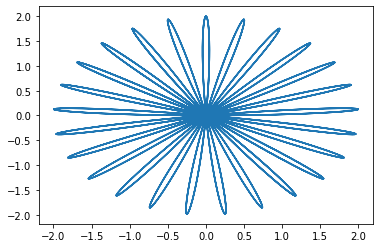

In [35]:
import matplotlib.pyplot as plt

t = torch.linspace(-10, 10, steps=10000)

# compute x(t) and y(t) as defined above
x =  torch.cos(13 * t) + torch.sin(12 * t)
y =  torch.cos(12 * t) +  torch.sin(13 * t)

plt.plot(x.numpy(), y.numpy())

## Автоматическое вычисление градиентов

PyTorch автоматически вычисляет градиенты методом обратного распространения ошибки через модуль `autograd`.

Последовательность действий:
* Создавая тензор, сообщим, что ему нужны градиенты, используя `requires_grad`:
    * ```a = torch.zeros(10, requires_grad=True)```
    
* Определим дифференцируемую функцию потерь `loss = differentiable_funtion(a)`
* Вызовем `loss.backward()`
* Градиенты станут доступны в ```a.grads```

#### Обучим линейную регрессию на выборке Boston house prices.

In [36]:
from sklearn.datasets import load_boston
boston = load_boston()

In [37]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

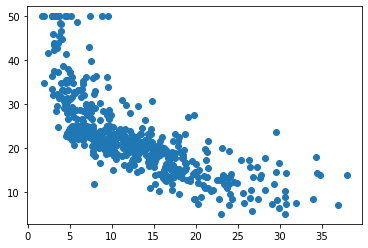

In [38]:
plt.scatter(boston.data[:, -1], boston.target)

In [39]:
w = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

x = torch.tensor(boston.data[:, -1] / 10, dtype=torch.float32)
y = torch.tensor(boston.target, dtype=torch.float32)

In [40]:
# генерируем прогнозы
y_pred = w * x + b

# определяем функцию потерь
loss = torch.mean((y_pred - y)**2)

# дифференцируем, получаем градиенты по всем интересуемым тензорам
loss.backward()

Градиенты теперь хранятся в `.grad` тех тензоров, для которых задали `requires_grad=True`

In [41]:
print("dL/dw = ", w.grad)
print("dL/db = ", b.grad)

dL/dw =  tensor([-47.3514])
dL/db =  tensor([-45.0656])


От последовательных вызовов `loss.backward()` градиенты суммируются. Поэтому важно **занулять градиенты** после каждого дифференцирвания.

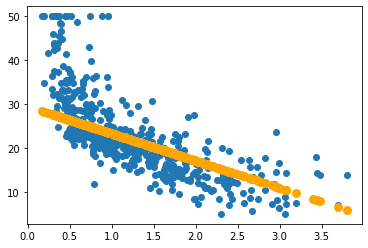

loss =  44.815567


In [42]:
from IPython.display import clear_output

w = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

for i in range(100):

    y_pred = w * x + b
    loss = torch.mean((y_pred - y)**2)
    loss.backward()

    w.data -= 0.05 * w.grad.data
    b.data -= 0.05 * b.grad.data

    # zero gradients
    w.grad.data.zero_()
    b.grad.data.zero_()

    if (i+1) % 5 == 0:
        clear_output(True)
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.scatter(x.data.numpy(), y_pred.data.numpy(),
                    color='orange', linewidth=3)
        plt.show()

        print("loss = ", loss.data.numpy())

Для поиска нелинейных зависимостей можно использовать нелинейные признаки или нелинейные преобразования.

<center>
<img src="./images/nn.jpeg" width=400/>
</center>

# Высокоуровневый PyTorch

До этого мы использовали низкоуровневый API. Это важно для создания специфических слоёв, функций потерь и методов оптимизации.

Если используем стандартные, то для них уже есть высокоуровневые реализации на PyTorch.

Рассмотрим их, используя задачу распознавания рукописных цифр из выборки MNIST.

In [43]:
from mnist import load_dataset
X_train, y_train, X_val, y_val, X_test, y_test = load_dataset()

X_train, X_test, X_val  = X_train.reshape([-1, 784]), X_test.reshape([-1, 784]), X_val.reshape([-1, 784])

print("Train size = %i, val_size = %i, test_size = %i" % (len(X_train), len(X_val), len(X_test)))

Train size = 50000, val_size = 10000, test_size = 10000


In [44]:
X_train.shape  # images 28x28 vectorized to 1x784

(50000, 784)

In [45]:
set(y_train) # original classes 0,1,2,...9

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

Выберем только изображения цифр 0, 1:

In [46]:
X_train = X_train[y_train < 2]
X_test = X_test[y_test < 2]
X_val = X_val[y_val < 2]

y_train = y_train[y_train < 2]
y_test = y_test[y_test < 2]
y_val = y_val[y_val < 2]

In [47]:
print("Train size = %i, val_size = %i, test_size = %i" % (len(X_train), len(X_val), len(X_test)))

Train size = 10610, val_size = 2055, test_size = 2115


In [48]:
from matplotlib.pyplot import figure

Визуализируем несколько объектов выборки.

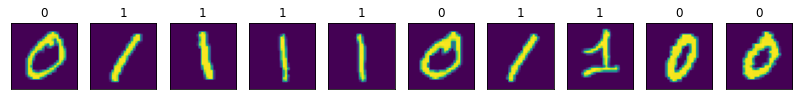

In [49]:
num_samples = 10
figure(figsize=(14,6))

for i in range(num_samples):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(X_train[i].reshape([28, 28]))
    plt.xticks([], [])
    plt.yticks([], [])
    plt.title(str(y_train[i]))

Определим на высоком уровне слои. Для этого нам понадобится класс __`torch.nn.Module`__

In [50]:
from torch import nn
import torch.nn.functional as F

print(nn.Module.__doc__)

Base class for all neural network modules.

    Your models should also subclass this class.

    Modules can also contain other Modules, allowing to nest them in
    a tree structure. You can assign the submodules as regular attributes::

        import torch.nn as nn
        import torch.nn.functional as F

        class Model(nn.Module):
            def __init__(self):
                super(Model, self).__init__()
                self.conv1 = nn.Conv2d(1, 20, 5)
                self.conv2 = nn.Conv2d(20, 20, 5)

            def forward(self, x):
                x = F.relu(self.conv1(x))
                return F.relu(self.conv2(x))

    Submodules assigned in this way will be registered, and will have their
    parameters converted too when you call :meth:`to`, etc.

    :ivar training: Boolean represents whether this module is in training or
                    evaluation mode.
    :vartype training: bool
    


In [51]:
set(y_train)  # binary classification

{0, 1}

Поскольку решается задача бинарной классификации, обучим __логистическую регрессию__. Для этого нам понадобится сигмоидная функция активации.
$$P(y_i | x_i) = \sigma(w \cdot x_i + b) ={ 1 \over {1+e^{- [w \cdot x_i + b]}} }$$


In [52]:
# nn.Sequential() - класс-обертка для последовательности слоев сети (модулей)
model = nn.Sequential()

# создадим полносвязный слой с 784 входами и 1 выходом.
model.add_module('l1', nn.Linear(784, 1))

# добавим сигмоидную активацию
model.add_module('l2', nn.Sigmoid())

In [53]:
print("Weight shapes:", [w.shape for w in model.parameters()])

Weight shapes: [torch.Size([1, 784]), torch.Size([1])]


In [54]:
# построим прогнозы для 3х объектов (784 признаков в каждом)
x = torch.tensor(X_train[:3], dtype=torch.float32)  # тензор размера 3x784
y = torch.tensor(y_train[:3], dtype=torch.float32)  # тензор размера 3

# compute outputs given inputs, both are variables
y_predicted = model(x)[:, 0]

y_predicted  # display what we've got

tensor([0.4083, 0.4948, 0.4994], grad_fn=<SelectBackward>)

Определим **функцию потерь**.

Естественный выбор для бинарной классификации - бинарная кросс-энропия (cross-entropy, logloss, negative log-likelihood):
$$ L = {1 \over N} \underset{X_i,y_i} \sum - [  y_i \cdot log P(y_i | X_i) + (1-y_i) \cdot log (1-P(y_i | X_i)) ]$$
Она уже определена в `torch.nn.functional.binary_cross_entropy`, но в образовательных целях реализуем её самостоятельно. 



In [55]:
crossentropy =  - (y * torch.log(y_predicted) + (1 - y) * torch.log(1 - y_predicted))
loss = torch.mean(crossentropy)

assert tuple(crossentropy.size()) == (3,), "Crossentropy must be a vector with element per sample"
assert tuple(loss.size()) == torch.Size([]), "Loss must be scalar. Did you forget the mean/sum?"
assert loss.data > 0, "Crossentropy must non-negative, zero only for perfect prediction"

__Встроенные оптимизаторы PyTorch__

При обучении линейной регрессии выше, мы вручную реализовывали метод SGD и зануляли градиенты. Для многослойных архитектур делать это вручную неудобно.
На практике проще использовать готовые оптимизаторы из `torch.optim` и функцию зануления всех градиентов. 

In [56]:
opt = torch.optim.SGD(model.parameters(), lr=0.01)

# шаблон использования:
loss.backward()      # add new gradients
opt.step()           # change weights
opt.zero_grad()      # clear gradients

In [57]:
# удалим более не используемые переменные, чтобы не возникало ошибок в будущем
del x, y, y_predicted, loss

### Объединяем всё вместе

In [58]:
# задаём архитектуру сети
model = nn.Sequential()
model.add_module('first', nn.Linear(784, 1))
model.add_module('second', nn.Sigmoid())

opt = torch.optim.Adam(model.parameters(), lr=1e-3)

In [59]:
y_train

array([0, 1, 1, ..., 0, 0, 0], dtype=uint8)

In [60]:
history = []

for i in range(501):

    # сэмплируем 256 случайных изображений
    ix = np.random.randint(0, len(X_train), 256)
    x_batch = torch.tensor(X_train[ix], dtype=torch.float32)
    y_batch = torch.tensor(y_train[ix], dtype=torch.float32)
    
    #print(x_batch)

    # предсказываем вероятности
    y_predicted =  model.forward(x_batch)[:, 0]

    assert y_predicted.dim() == 1, "did you forget to select first column with [:, 0]"

    # вычисляем функцию потерь
    crossentropy = - (y_batch * torch.log(y_predicted) + (1 - y_batch) * torch.log(1 - y_predicted))
    loss = torch.mean(crossentropy) 
    

    # вычисляем градиенты
    loss.backward()

    # шаг оптимизатора Adam
    opt.step()

    # обнуляем градиенты
    opt.zero_grad()

    history.append(loss.data.numpy())

    if i % 50 == 0:
        print("step #%i | mean loss = %.3f" % (i, np.mean(history[-10:])))

step #0 | mean loss = 0.759
step #50 | mean loss = 0.210
step #100 | mean loss = 0.103
step #150 | mean loss = 0.065
step #200 | mean loss = 0.049
step #250 | mean loss = 0.042
step #300 | mean loss = 0.034
step #350 | mean loss = 0.027
step #400 | mean loss = 0.026
step #450 | mean loss = 0.026
step #500 | mean loss = 0.018


### Оценка качества

Оценим точность настроенной модели на тестовых данных.

In [61]:
predicted_y_test =  model(torch.tensor(X_test))
predicted_y_test = predicted_y_test.squeeze().detach().numpy() > 0.5
accuracy = np.mean(predicted_y_test == y_test)

print("Test accuracy: %.5f" % accuracy)

Test accuracy: 0.99953


In [ ]:
cuda = torch.device('cuda')     # видеокарта по умолчанию
cuda0 = torch.device('cuda:0')
cuda2 = torch.device('cuda:1')  # вторая видеокарта

x = torch.tensor([1., 2.], device=cuda0)  # первая видеокарта
y = torch.tensor([1., 2.]).cuda() # # видеокарта по умолчанию

## Для самостоятельного изучения:
* [Использование PyTorch с видеокартой](http://pytorch.org/docs/master/notes/cuda.html)
* [60 минутный официальный видеоурок по PyTorch](http://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html)
* [Официальная документация по PyTorch](https://pytorch.org/tutorials/index.html)
* [Примеры Pytorch, реализующие различные глубокие нейросетевые модели](https://github.com/pytorch/examples)
* [Книга по глубокому обучению с примерами на PyTorch](https://d2l.ai/index.html)